In [16]:
#分析に必要なライブラリ、モジュールをimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as display
sns.set()
import urllib.request
from io import StringIO
#回帰分析で使うライブラリ
import scipy.stats as stats
import statsmodels.formula.api as smf
#scikit-Learnで使うもの
from sklearn.impute import SimpleImputer #欠損値の補間
from sklearn.model_selection import train_test_split #データの分割
from sklearn.preprocessing import MinMaxScaler #正規化
from sklearn.preprocessing import StandardScaler #標準化
from sklearn.linear_model import LinearRegression #重回帰モデル
from sklearn.linear_model import Ridge #　Ridge回帰
from sklearn.linear_model import Lasso #Lasso回帰
from sklearn.preprocessing import PolynomialFeatures #高次項の生成
from sklearn.metrics import r2_score #決定係数の計算
from sklearn.metrics import mean_squared_error #MSEの計算
from sklearn.metrics import mean_absolute_error #MAEの計算

In [17]:
%pip install xgboost

import xgboost as xgb

Note: you may need to restart the kernel to use updated packages.


In [18]:
%pip install lightgbm

import lightgbm as lgb

Note: you may need to restart the kernel to use updated packages.


In [19]:
#WEB上のcsvデータを読み込んでデータフレームとする。
import pandas as pd
#データを読み込む関数を定義
def read_csv(file_name):
    print(file_name)
    df = pd.read_csv(file_name)
    return df

def read_csv_sub(file2):
    print(file2)
    df = pd.read_csv(file2,header=None)
    return df

#WEB上のデータのURLを指定
file_train = "smbc/train.csv"
file_test = "smbc/test.csv"
file_sample_submition = "smbc/sample_submission.csv"
#データを読み込む
df_train = read_csv(file_train)
df_test = read_csv(file_test)
df_sample_submission = read_csv_sub(file_sample_submition)

#データの概要を確認
display.display(df_train.head())
display.display(df_test.head())
display.display(df_sample_submission.head())



smbc/train.csv
smbc/test.csv
smbc/sample_submission.csv


,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,...,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51
3,3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,NaN,...,SI11,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51
4,4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,Stones,...,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9


,Unnamed: 0,created_at,tree_dbh,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,19984,2015-09-08,15,OnCurb,NaN,NaN,Damage,NYC Parks Staff,NaN,Callery pear,...,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3,3062000,Brooklyn,Brooklyn,315,22,45,48
1,19985,2015-10-15,5,OnCurb,1or2,NaN,NoDamage,Volunteer,NaN,cherry,...,BX62,Woodlawn-Wakefield,2,2045101,Bronx,Bronx,212,34,81,11
2,19986,2016-08-03,4,OnCurb,NaN,Unsure,NoDamage,Volunteer,NaN,littleleaf linden,...,QN60,Kew Gardens,4,4013800,Queens,Kew Gardens,409,14,27,29
3,19987,2015-08-06,7,OnCurb,NaN,NaN,NoDamage,TreesCount Staff,NaN,dawn redwood,...,BK09,Brooklyn Heights-Cobble Hill,3,3000301,Brooklyn,Brooklyn,302,26,52,33
4,19988,2015-10-21,6,OnCurb,1or2,Helpful,NoDamage,TreesCount Staff,Stones,purple-leaf plum,...,BK75,Bedford,3,3025100,Brooklyn,Brooklyn,303,25,56,36


,0,1
0,19984,1
1,19985,2
2,19986,0
3,19987,1
4,19988,2


In [20]:
#df_trainのデータの概要を確認
display.display(df_train.describe())

#df_testのデータの概要を確認
display.display(df_test.describe())

,Unnamed: 0,tree_dbh,health,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist
count,19984.000000,19984.000000,19984.000000,19984.000000,1.998400e+04,19984.000000,19984.000000,19984.000000,19984.000000
mean,9991.500000,11.694906,0.858036,3.360088,3.405346e+06,343.159077,21.111189,51.913981,30.346327
std,5769.028226,8.198150,0.437807,1.232246,1.239741e+06,122.264942,7.188537,18.642931,14.824068
min,0.000000,1.000000,0.000000,1.000000,1.000202e+06,101.000000,10.000000,23.000000,1.000000
25%,4995.750000,5.000000,1.000000,3.000000,3.005900e+06,301.000000,15.000000,33.000000,19.000000
50%,9991.500000,9.000000,1.000000,4.000000,4.009200e+06,402.000000,22.000000,56.000000,31.000000
75%,14987.250000,17.000000,1.000000,4.000000,4.122300e+06,413.000000,25.000000,64.000000,44.000000
max,19983.000000,42.000000,2.000000,5.000000,5.031902e+06,503.000000,36.000000,87.000000,51.000000


,Unnamed: 0,tree_dbh,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist
count,19702.000000,19702.000000,19702.000000,1.970200e+04,19702.000000,19702.000000,19702.000000,19702.000000
mean,29982.877677,11.600041,3.360319,3.406002e+06,343.219775,20.992945,51.572581,30.215714
std,5767.184780,8.206049,1.223202,1.231092e+06,121.434253,7.208765,18.671359,14.721721
min,19984.000000,1.000000,1.000000,1.000202e+06,101.000000,10.000000,23.000000,1.000000
25%,24983.250000,5.000000,3.000000,3.006200e+06,302.000000,15.000000,32.000000,19.000000
50%,29980.500000,8.000000,4.000000,4.012301e+06,402.000000,22.000000,55.000000,31.000000
75%,34982.750000,17.000000,4.000000,4.115100e+06,413.000000,25.000000,64.000000,44.000000
max,39968.000000,44.000000,5.000000,5.031902e+06,503.000000,36.000000,87.000000,51.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'tree_dbh'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'borocode'}>,
        <Axes: title={'center': 'boro_ct'}>,
        <Axes: title={'center': 'cb_num'}>],
       [<Axes: title={'center': 'st_senate'}>,
        <Axes: title={'center': 'st_assem'}>,
        <Axes: title={'center': 'cncldist'}>]], dtype=object)

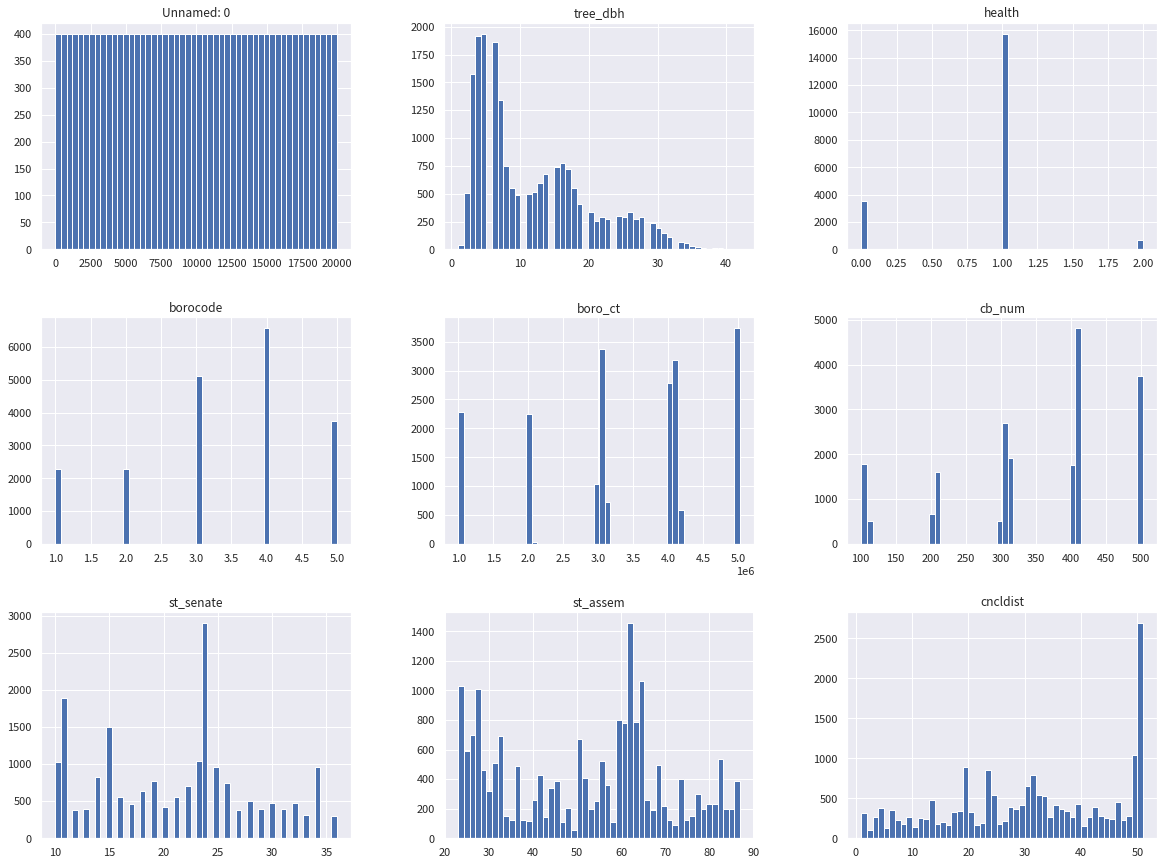

In [21]:
#df_trainのヒストグラムを確認
df_train.hist(bins=50, figsize=(20,15))

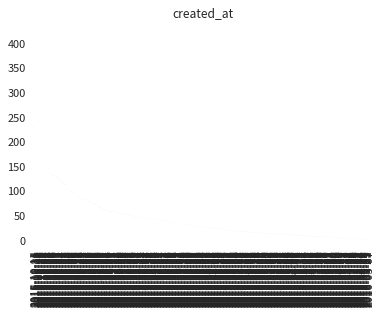

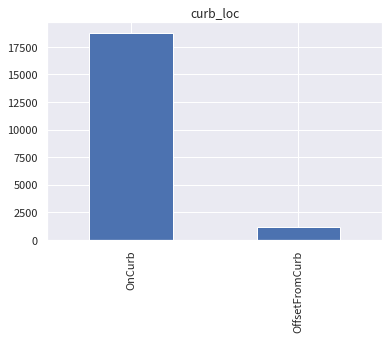

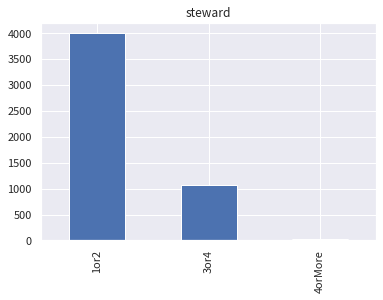

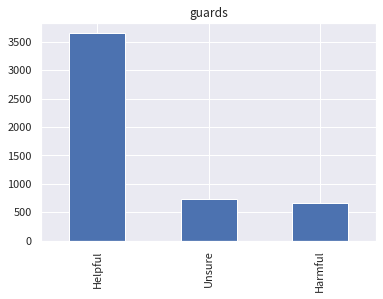

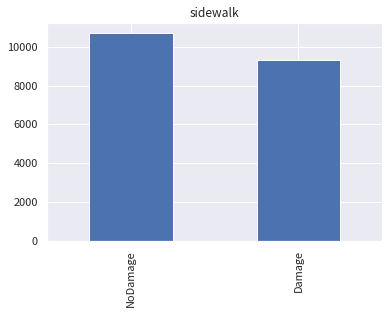

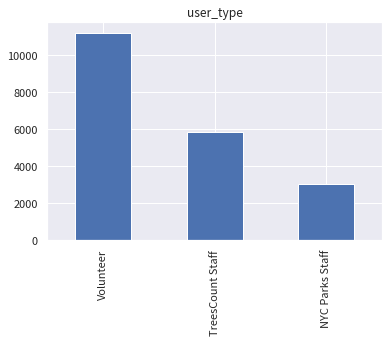

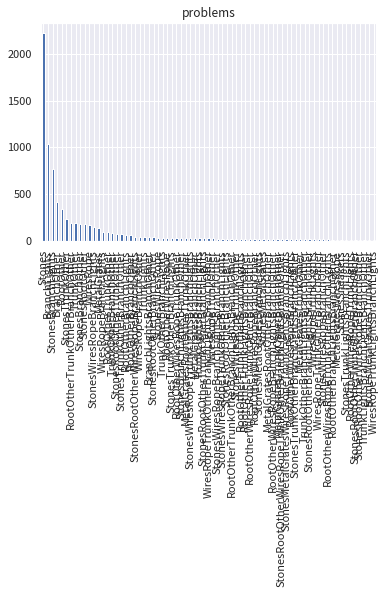

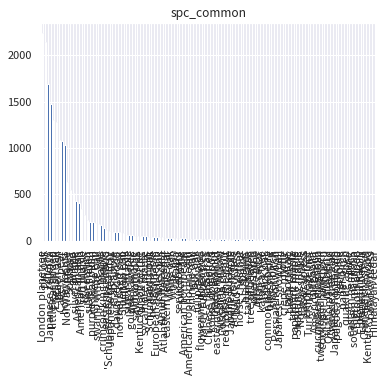

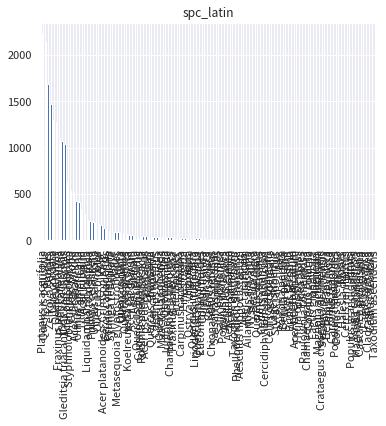

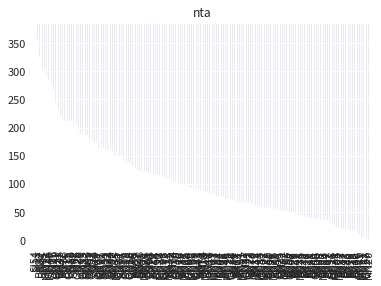

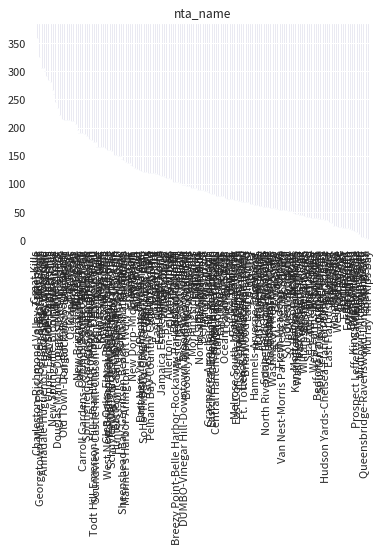

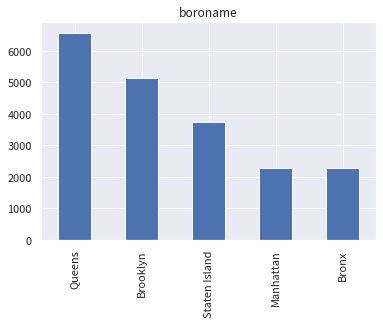

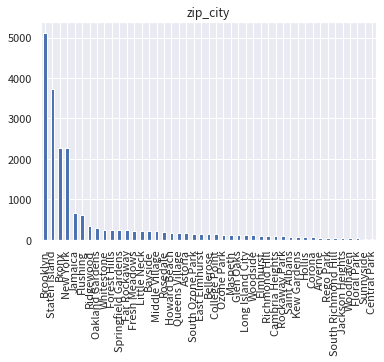

In [22]:
#df_trainのobject型のデータをカテゴリー型に変換
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train[col] = df_train[col].astype('category')


#カテゴリー型を含む列をカテゴリごとに分けて、それぞれのヒストグラムを確認
for col in df_train.columns:
    if df_train[col].dtype.name == 'category':
        df_train[col].value_counts().plot.bar()
        plt.title(col)
        plt.show()


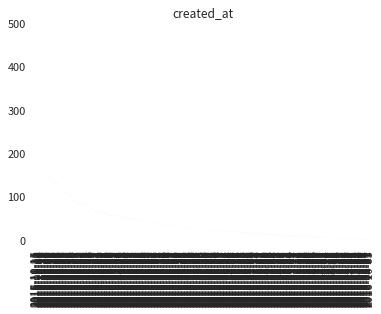

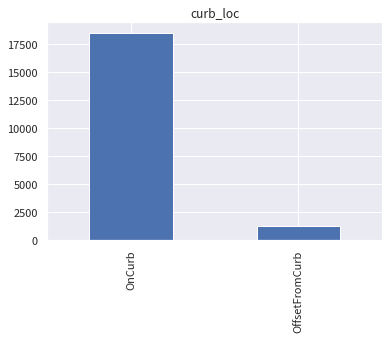

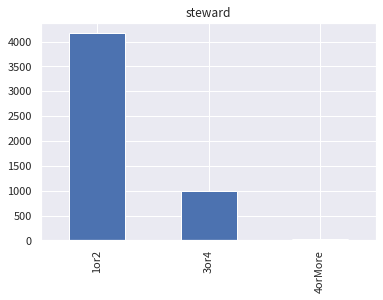

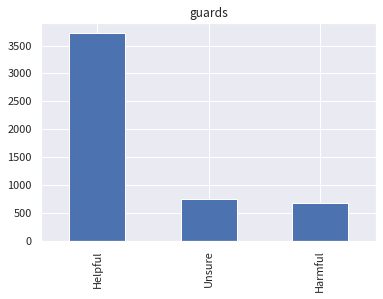

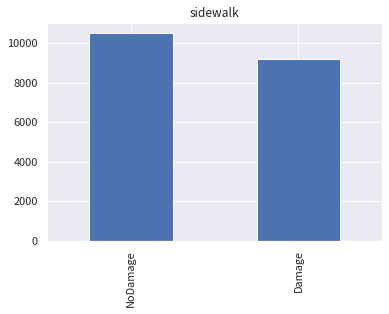

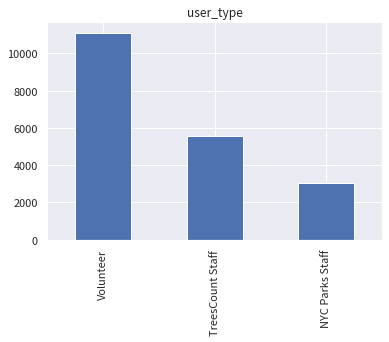

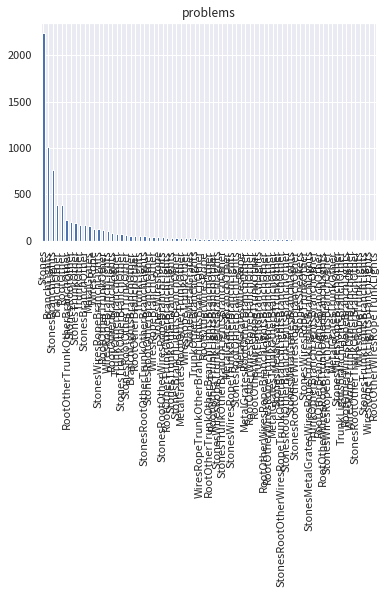

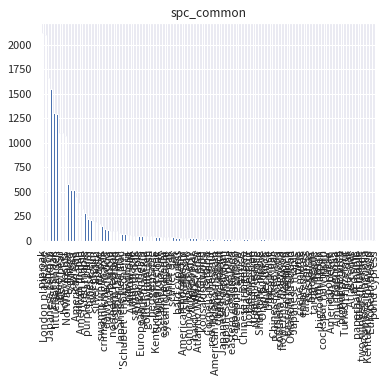

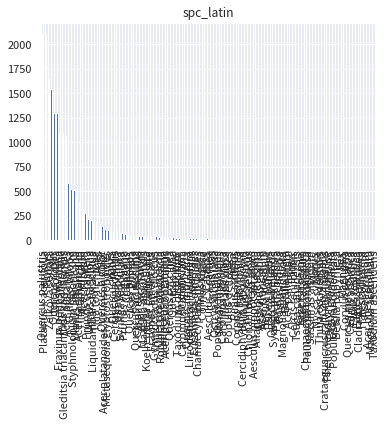

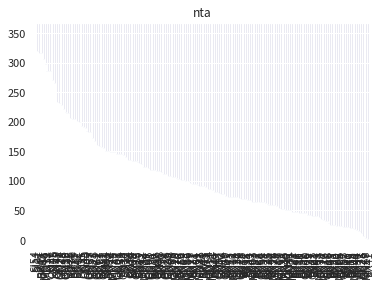

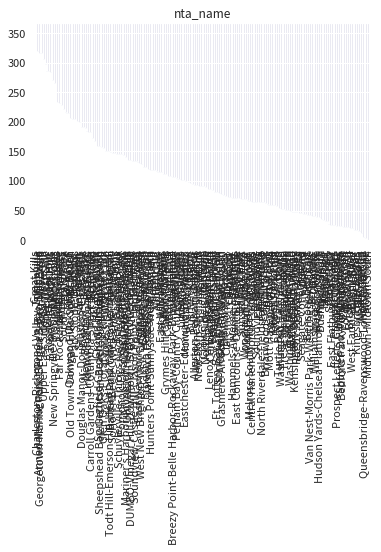

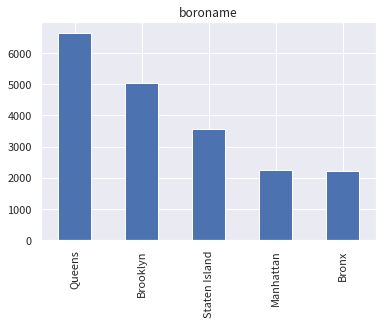

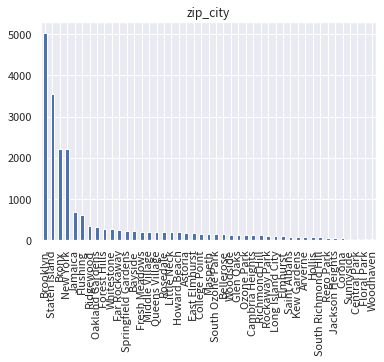

In [24]:
#df_testのobject型のデータをカテゴリー型に変換
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = df_test[col].astype('category')

for col in df_test.columns:
    if df_test[col].dtype.name == 'category':
        df_test[col].value_counts().plot.bar()
        plt.title(col)
        plt.show()


In [ ]:
#heathと各変数との関係をヒートマップで確認
plt.figure(figsize=(12, 9))
sns.heatmap(df_train.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [25]:

# Calculate the correlation between each feature and 'health'
correlation = df_train.corr()['health']

# Select the feature with the highest correlation
highest_correlation_feature = correlation.drop('health').idxmax()

# Create a new feature based on the selected feature
df_train['new_feature'] = df_train[highest_correlation_feature]
print(df_train['new_feature'].head())

# Create a new feature based on the selected feature
df_test['new_feature'] = df_test[highest_correlation_feature]
print(df_test['new_feature'].head())

0    23
1    15
2    51
3    51
4     9
Name: new_feature, dtype: int64
0    48
1    11
2    29
3    33
4    36
Name: new_feature, dtype: int64


In [9]:
#df_trainのデータの欠損値を確認
df_train.isnull().sum()

Unnamed: 0         0
created_at         0
tree_dbh           0
curb_loc           0
health             0
steward        14883
guards         14943
sidewalk           0
user_type          0
problems       12243
spc_common         0
spc_latin          0
nta                0
nta_name           0
borocode           0
boro_ct            0
boroname           0
zip_city           0
cb_num             0
st_senate          0
st_assem           0
cncldist           0
new_feature        0
dtype: int64

In [26]:
#データ型を確認
display.display(df_train.dtypes)
display.display(df_test.dtypes)

Unnamed: 0        int64
created_at     category
tree_dbh          int64
curb_loc       category
health            int64
steward        category
guards         category
sidewalk       category
user_type      category
problems       category
spc_common     category
spc_latin      category
nta            category
nta_name       category
borocode          int64
boro_ct           int64
boroname       category
zip_city       category
cb_num            int64
st_senate         int64
st_assem          int64
cncldist          int64
new_feature       int64
dtype: object

Unnamed: 0        int64
created_at     category
tree_dbh          int64
curb_loc       category
steward        category
guards         category
sidewalk       category
user_type      category
problems       category
spc_common     category
spc_latin      category
nta            category
nta_name       category
borocode          int64
boro_ct           int64
boroname       category
zip_city       category
cb_num            int64
st_senate         int64
st_assem          int64
cncldist          int64
new_feature       int64
dtype: object

In [27]:
#df_train,df_testのobject型のデータをone-hotエンコーディング
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

#df_train,df_testの表示 
display.display(df_train.head(10))
display.display(df_test.head())

,Unnamed: 0,tree_dbh,health,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist,new_feature,...,zip_city_Rosedale,zip_city_Saint Albans,zip_city_South Ozone Park,zip_city_South Richmond Hill,zip_city_Springfield Gardens,zip_city_Staten Island,zip_city_Sunnyside,zip_city_Whitestone,zip_city_Woodhaven,zip_city_Woodside
0,0,14,1,4,4152901,411,11,25,23,23,...,0,0,0,0,0,0,0,0,0,0
1,1,5,1,2,2039901,207,33,78,15,15,...,0,0,0,0,0,0,0,0,0,0
2,2,26,2,5,5017011,503,24,62,51,51,...,0,0,0,0,0,1,0,0,0,0
3,3,15,0,5,5024401,503,24,62,51,51,...,0,0,0,0,0,1,0,0,0,0
4,4,23,1,1,1022102,110,30,70,9,9,...,0,0,0,0,0,0,0,0,0,0
5,5,12,1,4,4088901,407,11,40,20,20,...,0,0,0,0,0,0,0,0,0,0
6,6,8,1,4,4086500,407,16,40,20,20,...,0,0,0,0,0,0,0,0,0,0
7,7,6,0,4,4052400,412,14,33,27,27,...,0,1,0,0,0,0,0,0,0,0
8,8,18,1,3,3116600,305,18,54,37,37,...,0,0,0,0,0,0,0,0,0,0
9,9,20,1,4,4120300,407,16,25,20,20,...,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0,tree_dbh,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist,new_feature,created_at_2015-05-19,...,zip_city_Rosedale,zip_city_Saint Albans,zip_city_South Ozone Park,zip_city_South Richmond Hill,zip_city_Springfield Gardens,zip_city_Staten Island,zip_city_Sunnyside,zip_city_Whitestone,zip_city_Woodhaven,zip_city_Woodside
0,19984,15,3,3062000,315,22,45,48,48,0,...,0,0,0,0,0,0,0,0,0,0
1,19985,5,2,2045101,212,34,81,11,11,0,...,0,0,0,0,0,0,0,0,0,0
2,19986,4,4,4013800,409,14,27,29,29,0,...,0,0,0,0,0,0,0,0,0,0
3,19987,7,3,3000301,302,26,52,33,33,0,...,0,0,0,0,0,0,0,0,0,0
4,19988,6,3,3025100,303,25,56,36,36,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19984 entries, 0 to 19983
Columns: 1207 entries, Unnamed: 0 to zip_city_Woodside
dtypes: int64(10), uint8(1197)
memory usage: 24.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19702 entries, 0 to 19701
Columns: 1196 entries, Unnamed: 0 to zip_city_Woodside
dtypes: int64(9), uint8(1187)
memory usage: 23.7 MB
None


In [29]:
#df_trainを学習用データと検証用データに分割する
X_train, X_valid, y_train, y_valid = train_test_split(df_train.drop('health',axis=1), df_train['health'], test_size=0.2, random_state=0)

[1 1 1 ... 1 1 1]
[[0.17375608 0.7999294  0.0263146 ]
 [0.11617991 0.86536986 0.01845021]
 [0.1343309  0.7836273  0.08204175]
 ...
 [0.24815856 0.7068398  0.04500167]
 [0.18818128 0.768694   0.04312474]
 [0.16778082 0.8159427  0.01627646]]
[1 1 1 ... 1 1 1]
Validation F1 Score (Macro): 0.30467163746789455
Validation balanced_accuracy: 0.3348510139834541
Validation recall: [0.02206897 0.98248408 0.        ]


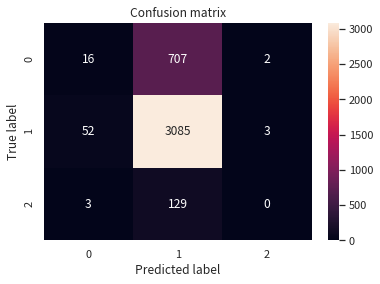

In [30]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from xgboost import XGBClassifier

#モデルのパラメータを設定する
params = {
    'max_depth': 3,
    'learning_rate': 1,
    'objective': 'multi:softprob', 
    'num_class': 3}

#モデルのインスタンス作成
model=xgb.XGBClassifier(**params)

#モデルを学習する
model.fit(X_train, y_train)

#予測する
tr_pred = model.predict(X_valid)
y_pred_prob = model.predict_proba(X_valid)
print(tr_pred)
print(y_pred_prob)

#予測結果を0,1,2のクラスラベルに変換する
tr_pred = np.round(tr_pred).astype(int)
print(tr_pred)

#予測精度を計算する
val_f1 = f1_score(y_valid, tr_pred, average='macro')
print(f"Validation F1 Score (Macro): {val_f1}")

#バランス精度を計算する
balanced_accuracy=balanced_accuracy_score(y_valid, tr_pred)
print(f"Validation balanced_accuracy: {balanced_accuracy}")

#recallを計算する
recall=recall_score(y_valid, tr_pred, average=None)
print(f"Validation recall: {recall}")

#混合行列を表示する
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, tr_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


In [32]:
# Check the shape of the test data
print(df_test.shape)

# Add missing features to the test data
missing_features = set(X_train.columns) - set(df_test.columns)
for feature in missing_features:
    df_test[feature] = 0

# Reorder the columns to match the training data
df_test = df_test[X_train.columns]

# Predict using the fixed test data
pred = model.predict(df_test)

# Convert the predictions to class labels
pred = np.round(pred).astype(int)

# Create the submission file
df_sample_submission[1] = pred
df_sample_submission.to_csv('submit.csv', header=None, index=False)
df_sample_submission.head()

(19702, 1196)


,0,1
0,19984,1
1,19985,1
2,19986,1
3,19987,1
4,19988,1


In [77]:
#特徴量と目的変数をlightgbmのデータ構造に変換する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

#多クラス分類のハイパーパラメータの設定
params = {'objective': 'multiclass', 'num_class': 3}


#学習の実行
model = lgb.train(params, lgb_train, valid_sets=lgb_eval)


#予測
y_pred = model.predict(X_valid, num_iteration=model.best_iteration)

#予測結果を0,1,2のクラスラベルに変換する
y_pred_max = np.argmax(y_pred, axis=1)

#予測精度を計算する
val_f1 = f1_score(y_valid, tr_pred, average='macro')
print(f"Validation F1 Score (Macro): {val_f1}")


#予測
y_pred = model.predict(df_test)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.


LightGBMError: Do not support special JSON characters in feature name.